In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t as t


In [15]:
def rolling_grubbs_test(df, window_size, col, alpha):
    outliers = []
    data = df[col].rolling(window_size).mean().dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data)
    t_critical = t.ppf(1 - alpha / (2 * n), n - 2)
    threshold = (n - 1) / np.sqrt(n) * np.sqrt(t_critical ** 2 / (n - 2 + t_critical ** 2))
    for i in range(window_size-1, df.shape[0]):
        start_idx = i - window_size + 1
        end_idx = i + 1
        sub_data = df[col].iloc[start_idx:end_idx].values
        #mean = np.mean(sub_data)
        #std = np.std(sub_data, ddof=1)
        #n = len(sub_data)
        #t_critical = t.ppf(1 - alpha / (2 * n), n - 2)
        #threshold = (n - 1) / np.sqrt(n) * np.sqrt(t_critical ** 2 / (n - 2 + t_critical ** 2))
        max_idx = np.argmax(np.abs(sub_data - mean) / std)
        if start_idx + max_idx in outliers:
            continue
        elif (max_idx < len(data)) and (np.abs(sub_data[max_idx] - mean) / std > threshold):
            outliers.append(start_idx + max_idx)
        mean = ((mean * n) - sub_data[0] + sub_data[-1]) / n
        std = np.std(data)
    return outliers

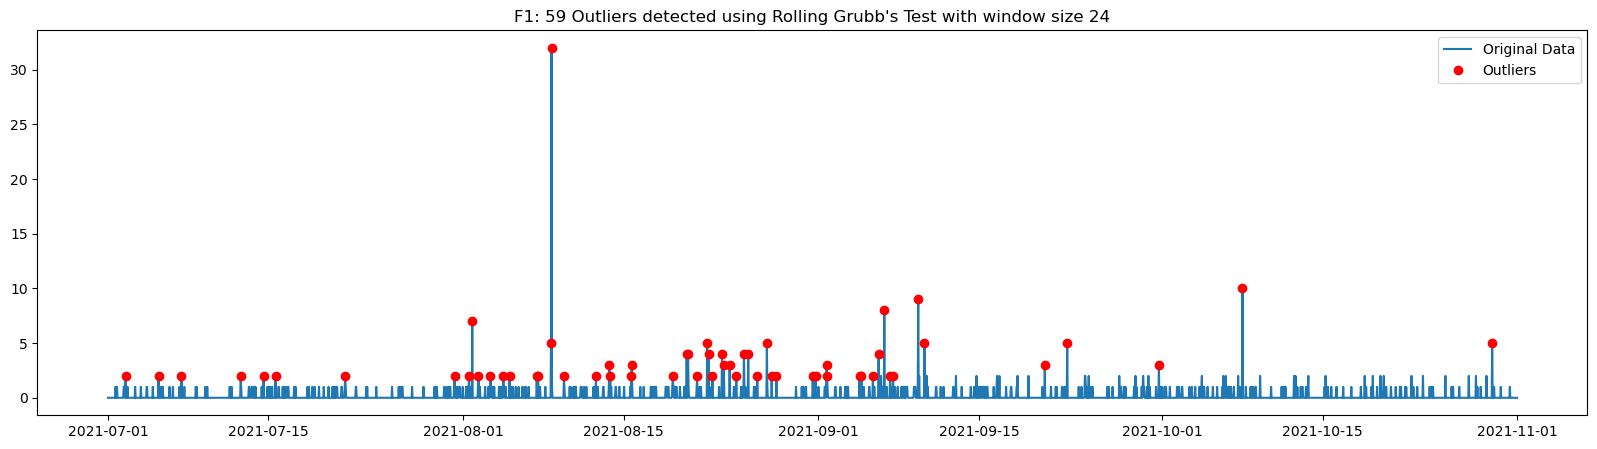

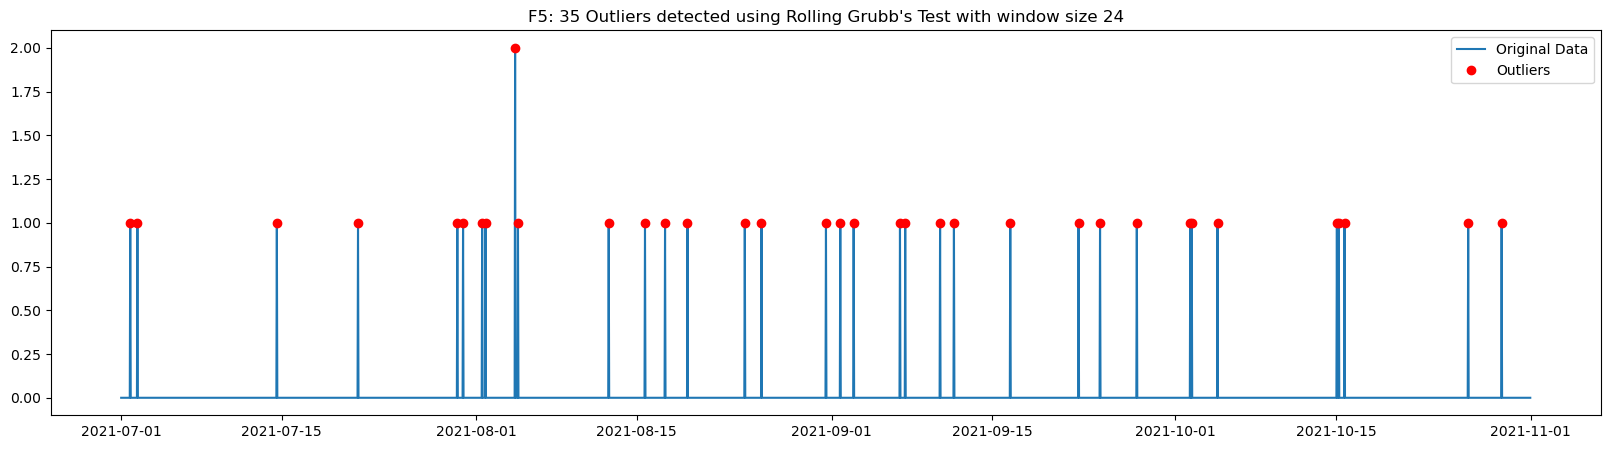

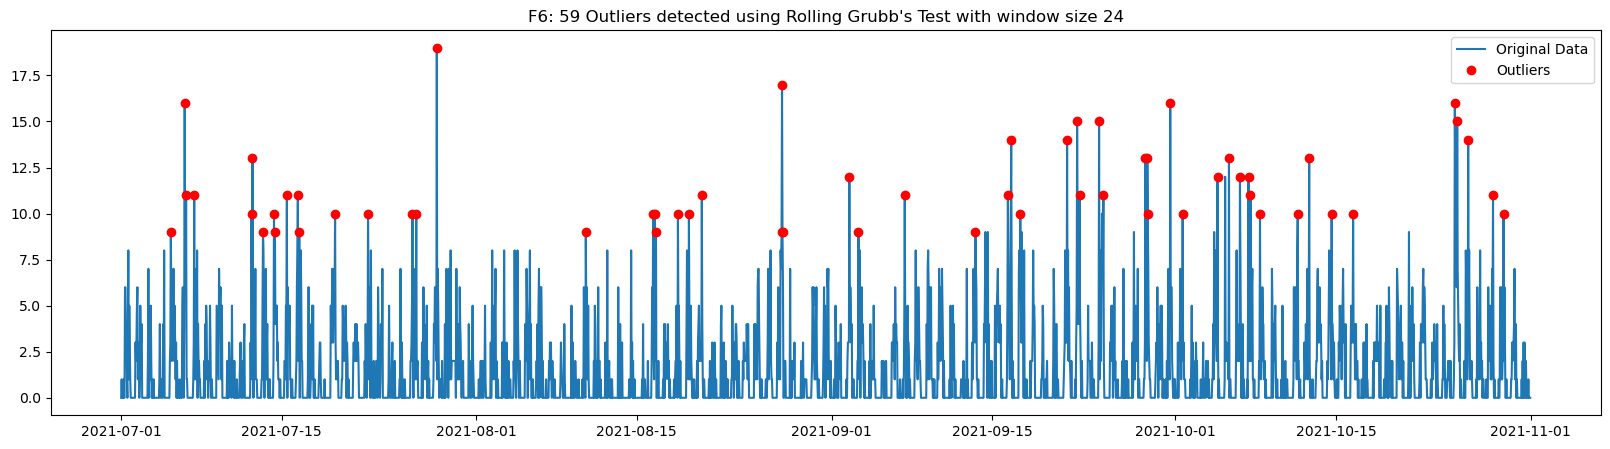

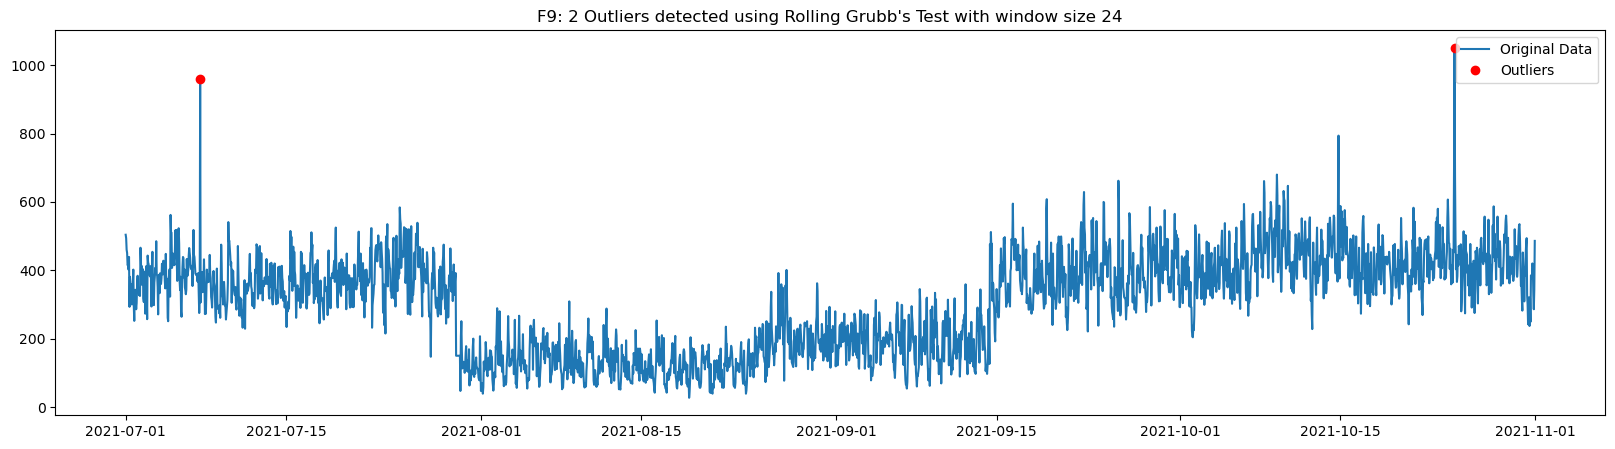

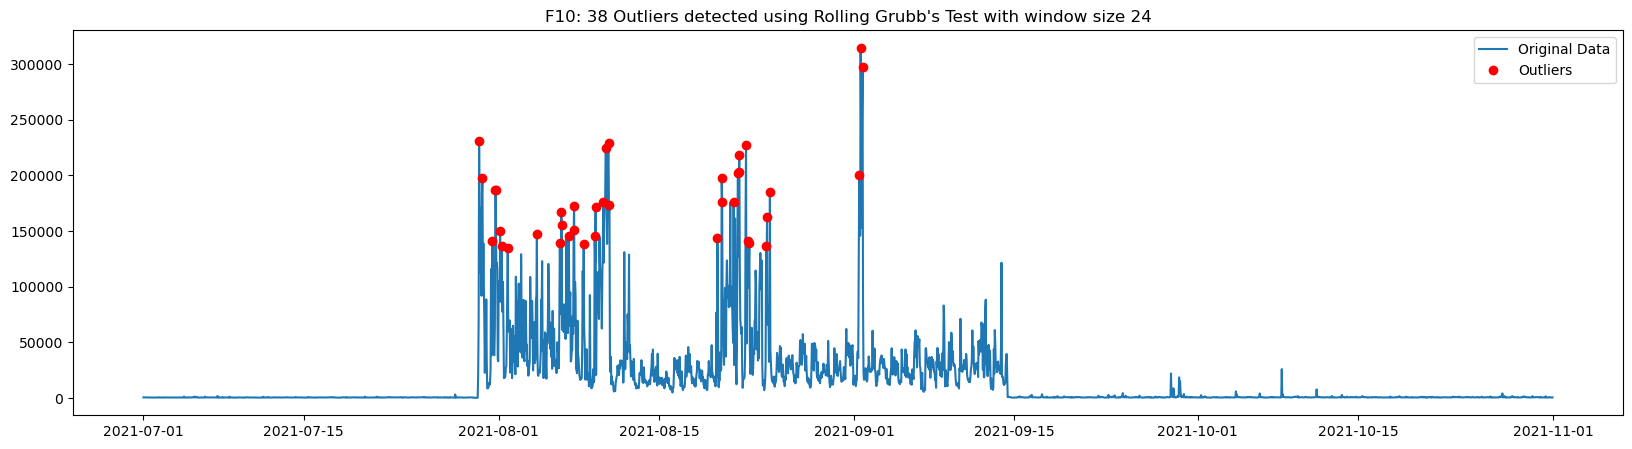

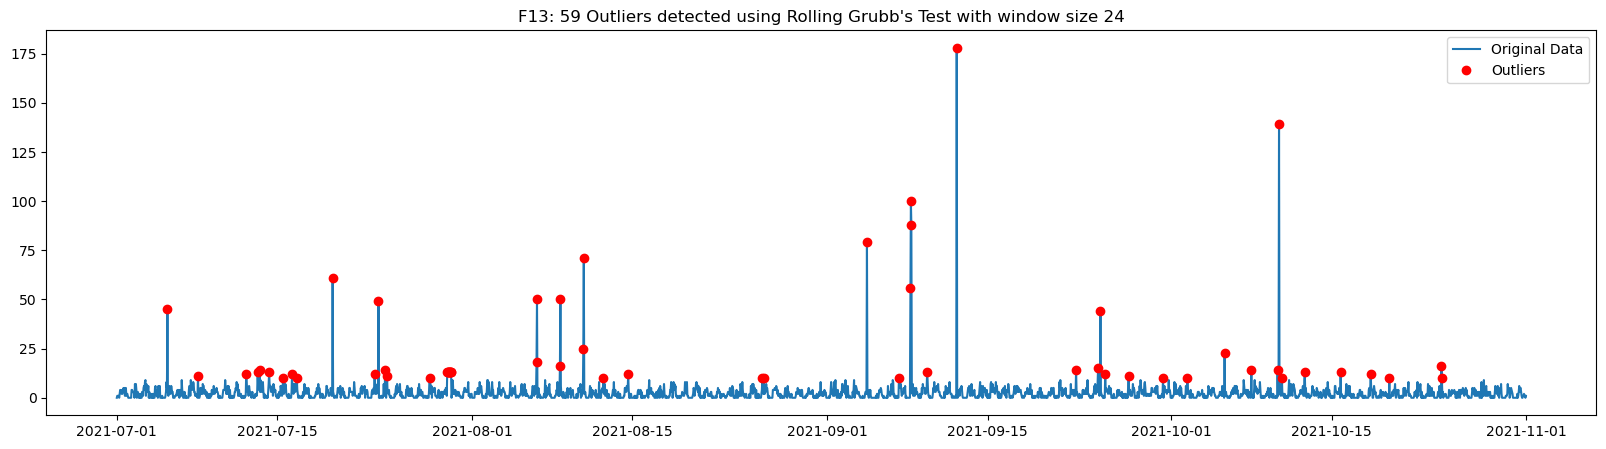

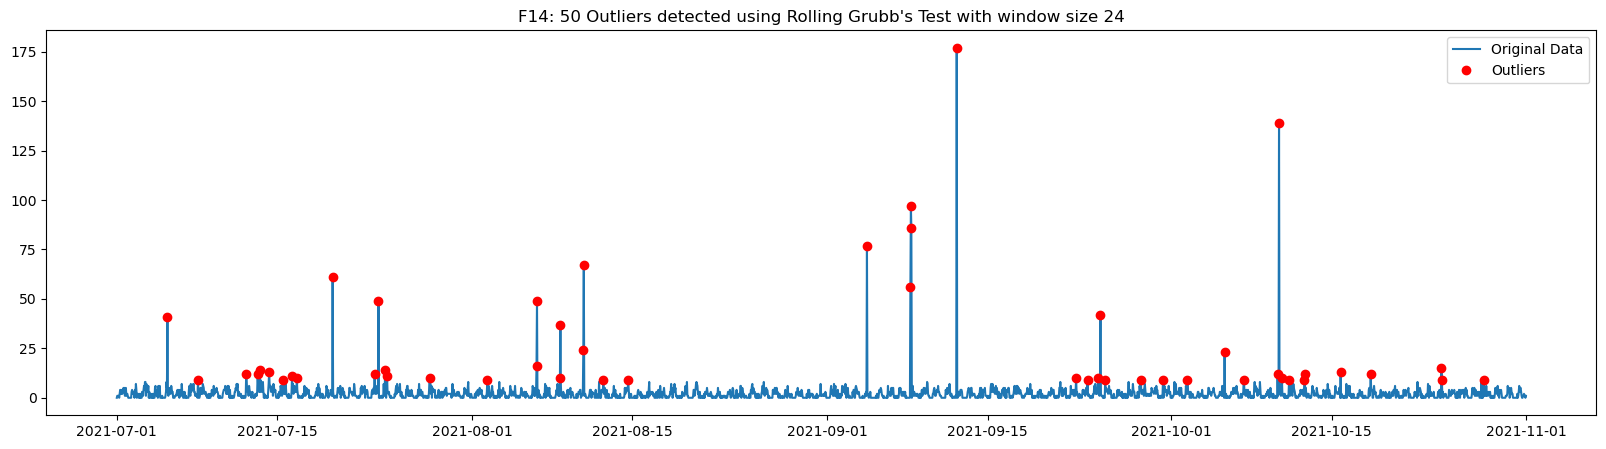

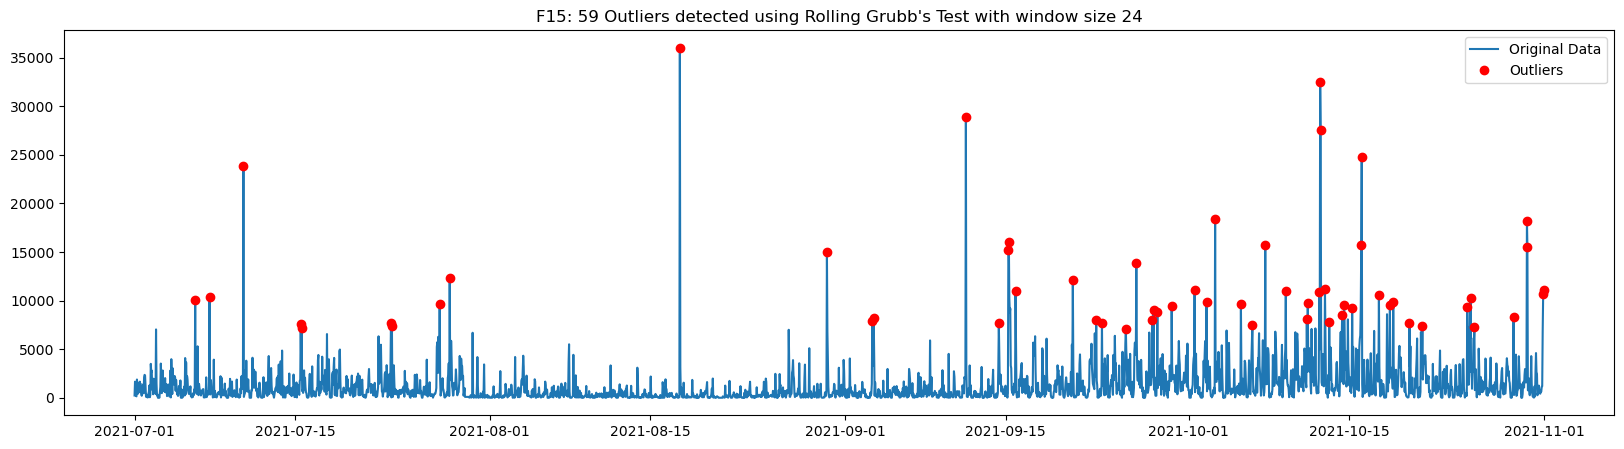

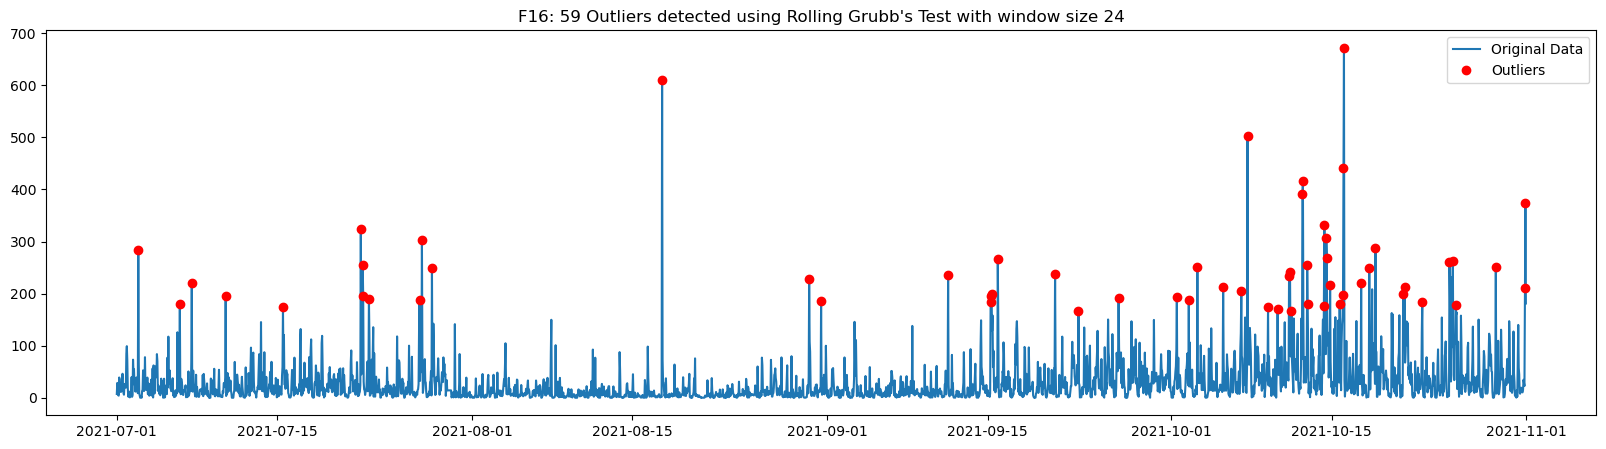

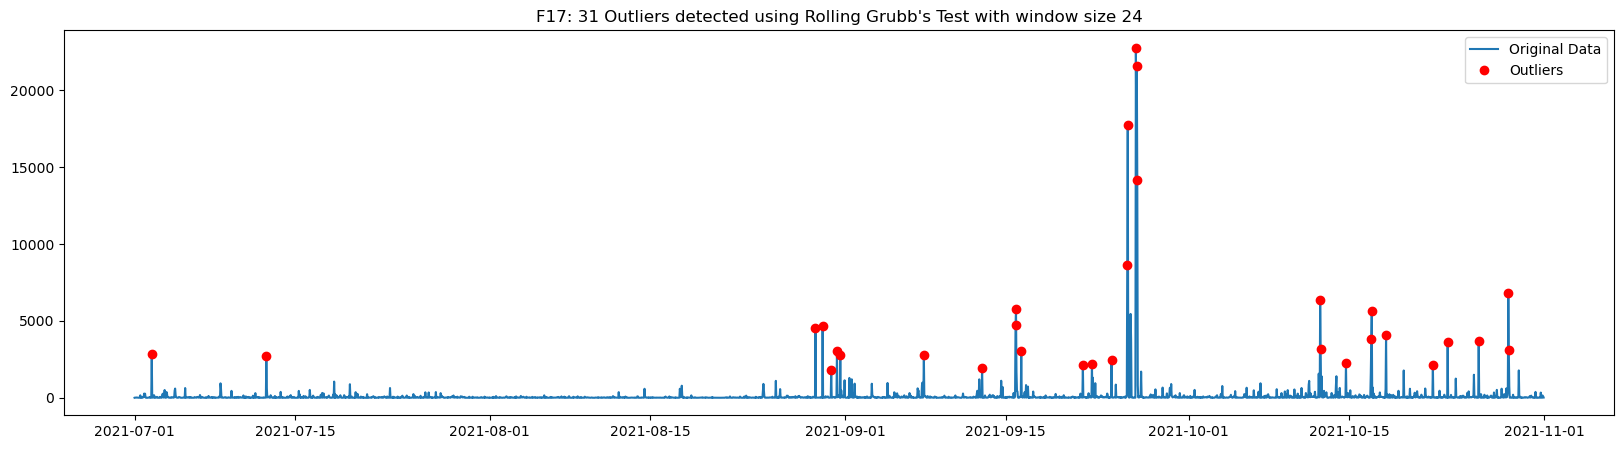

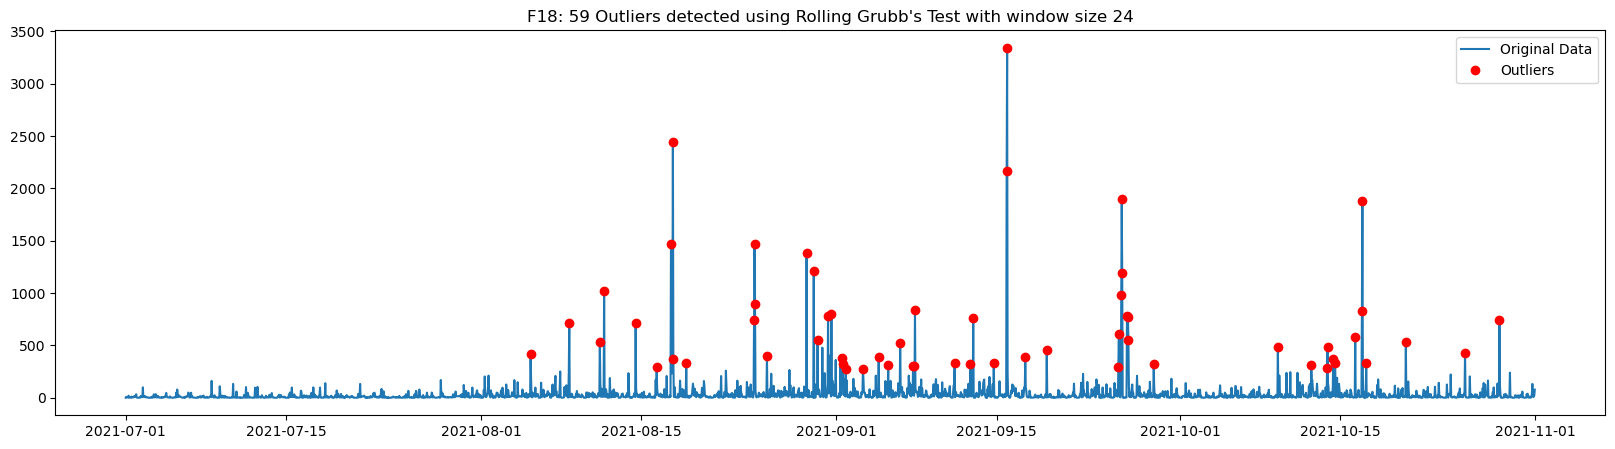

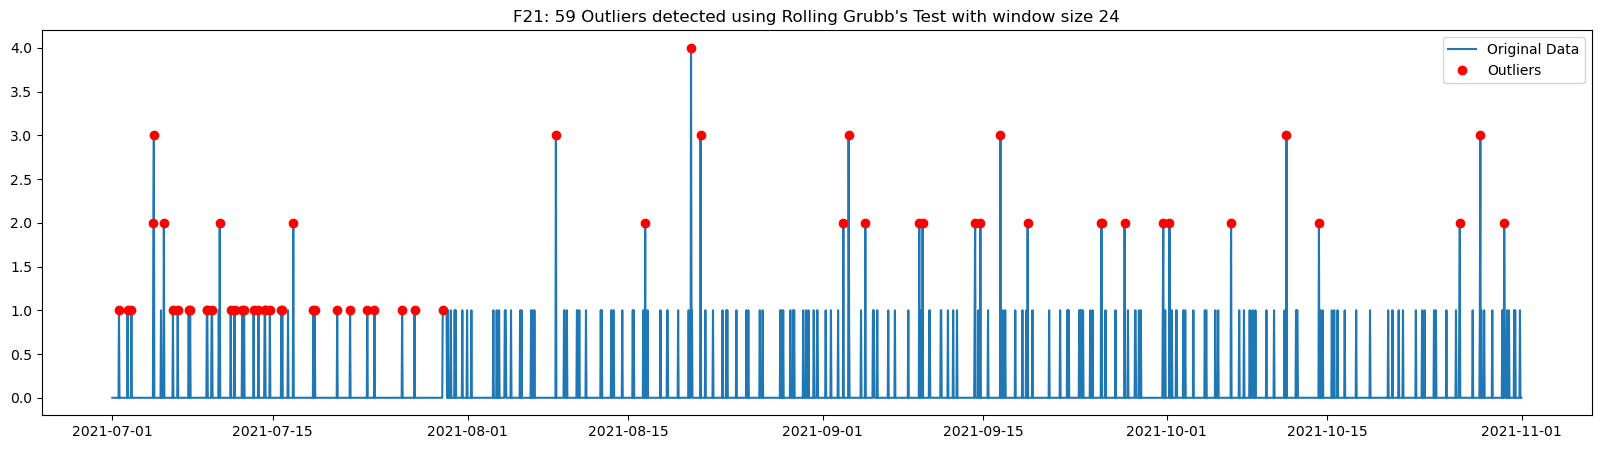

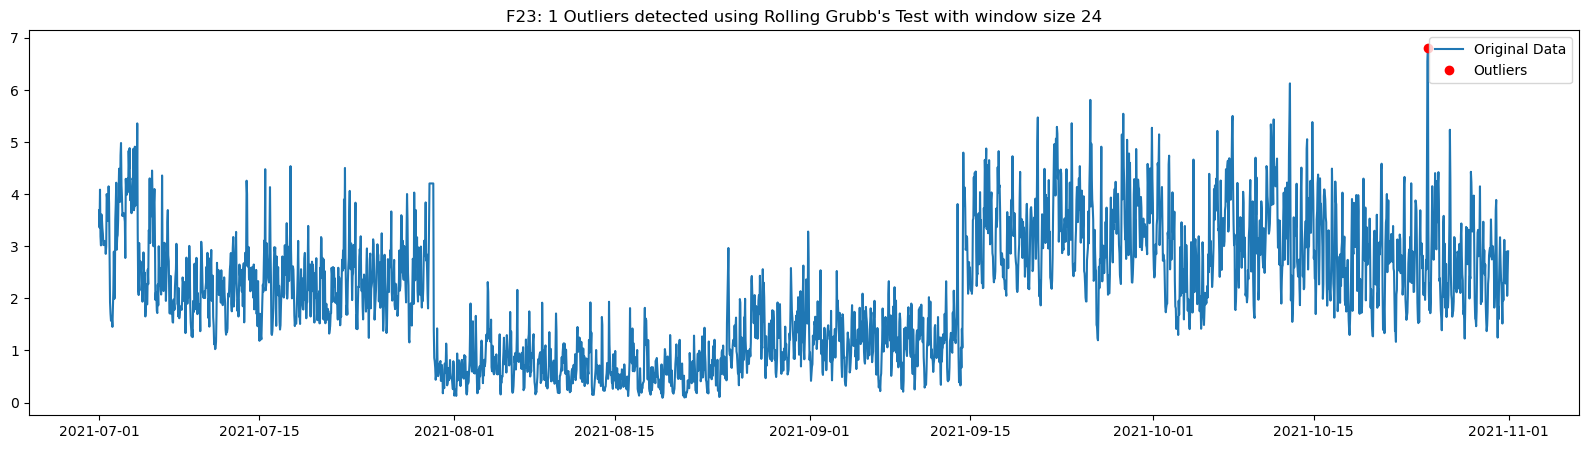

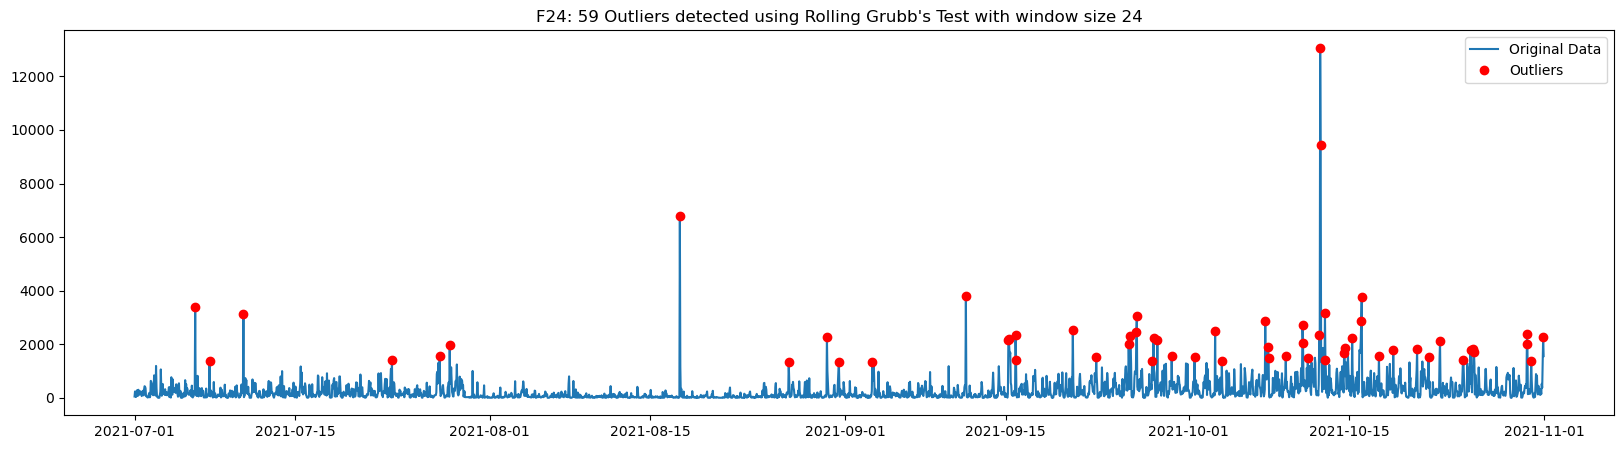

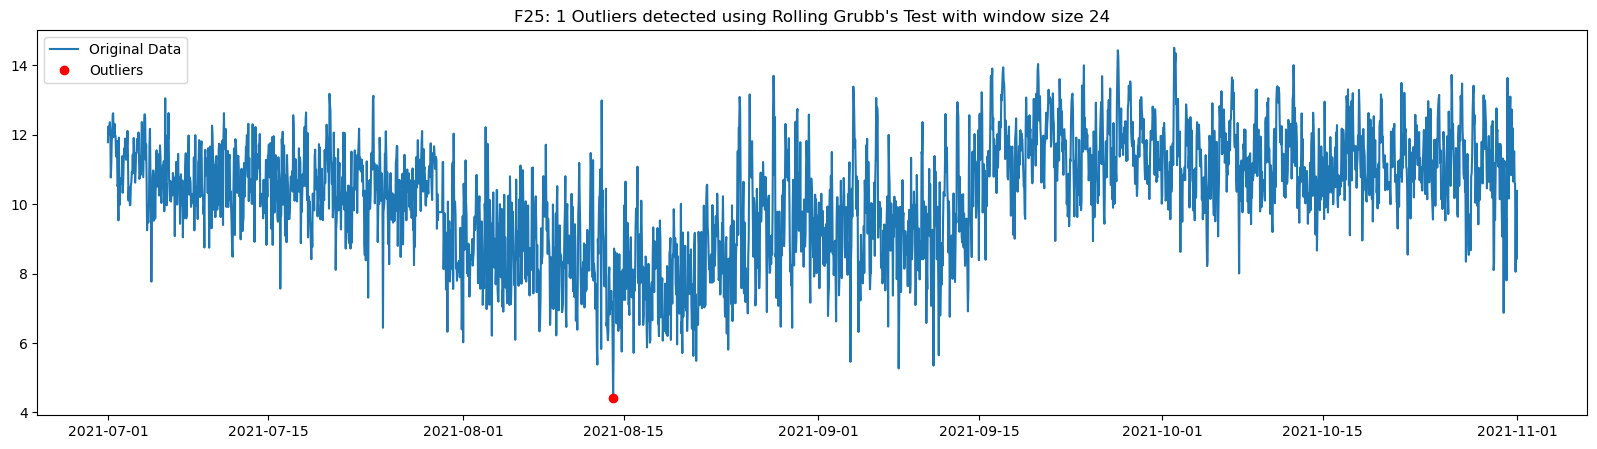

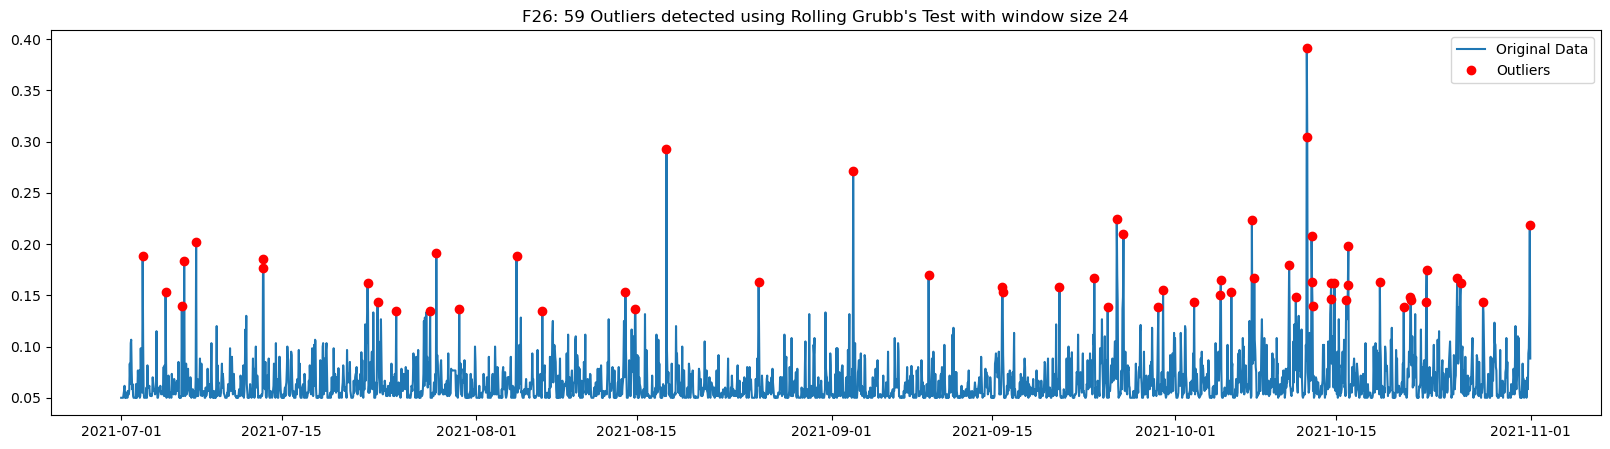

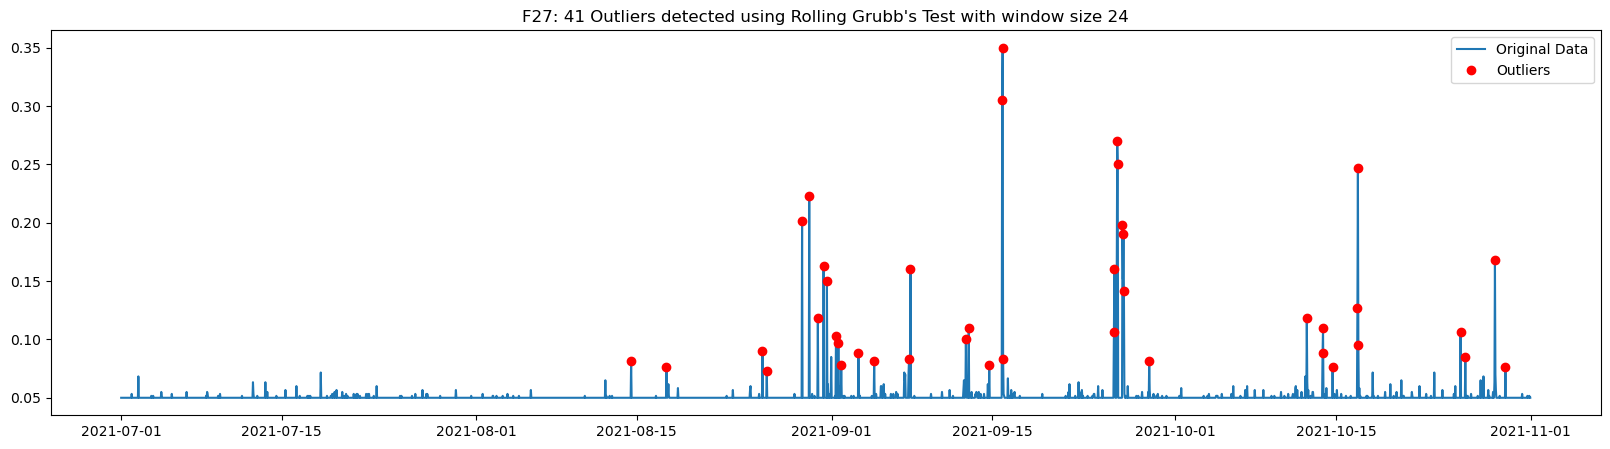

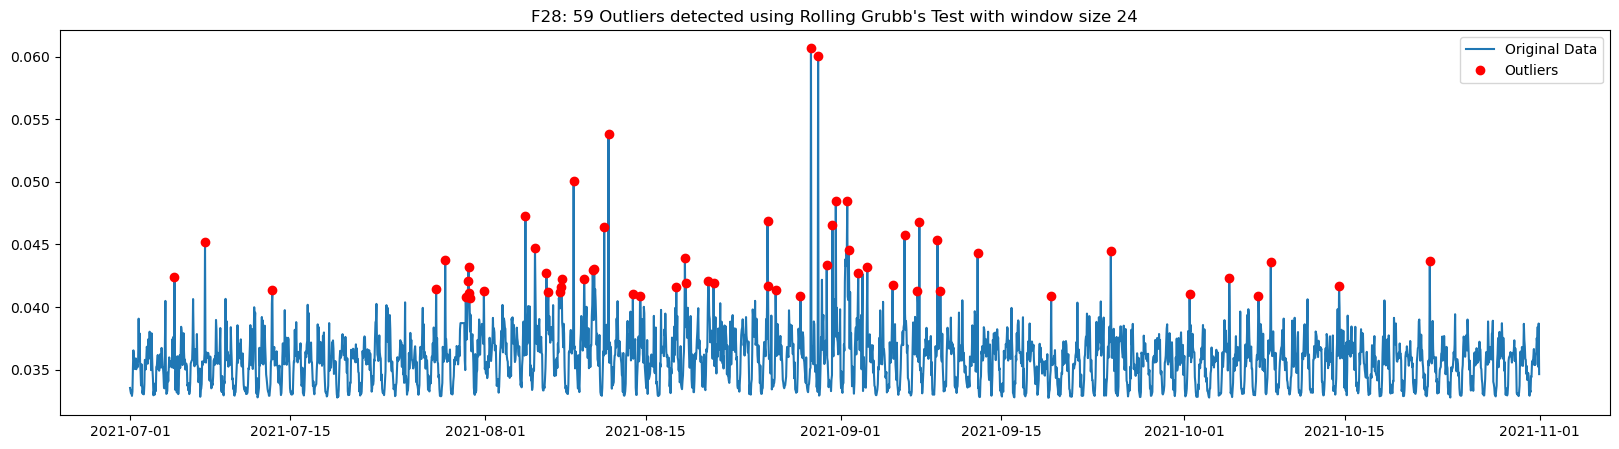

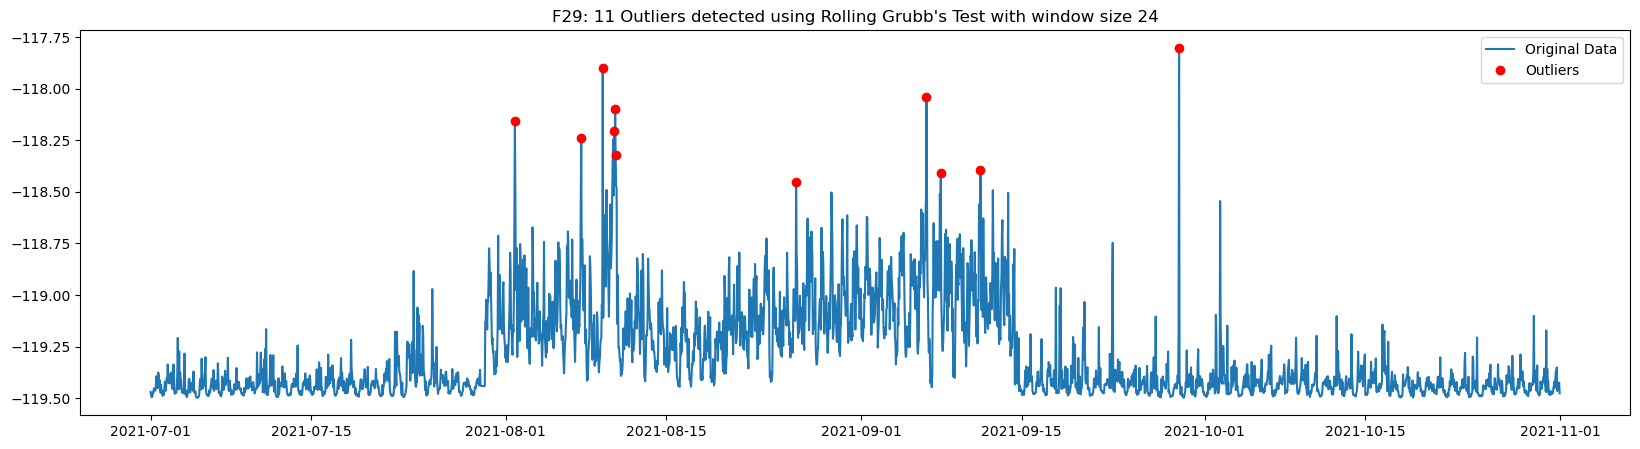

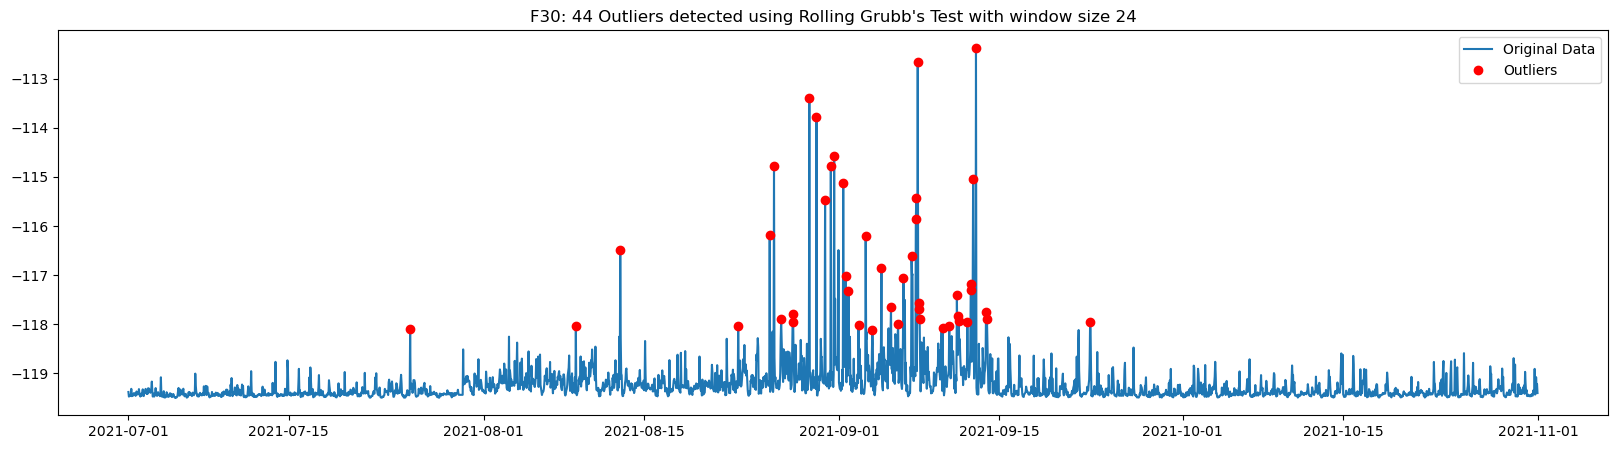

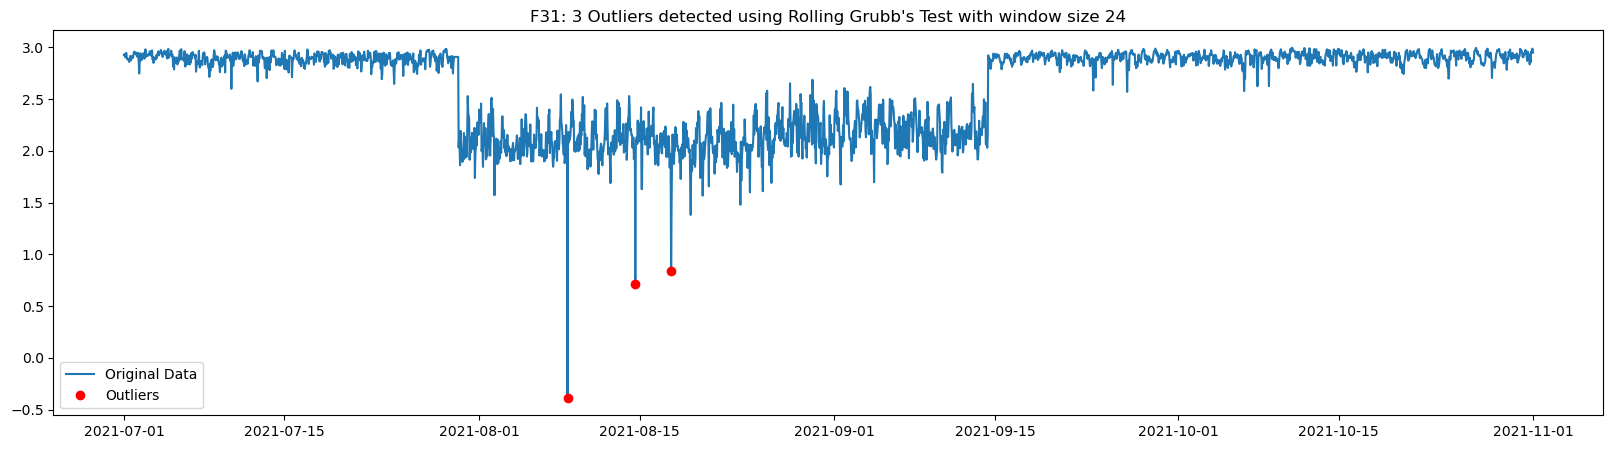

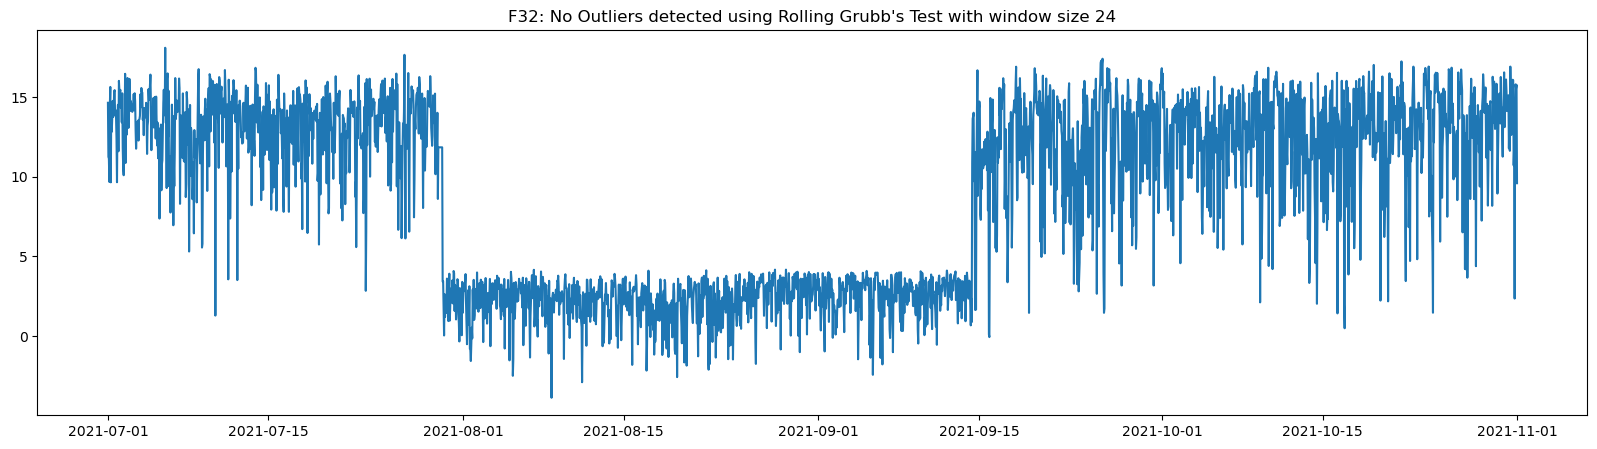

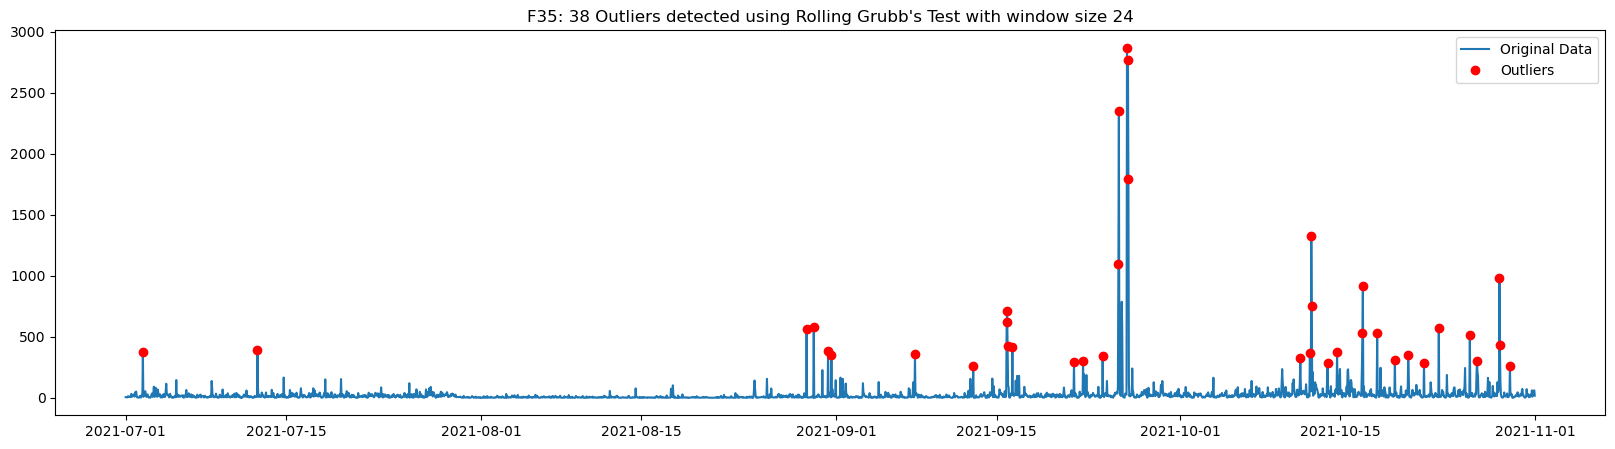

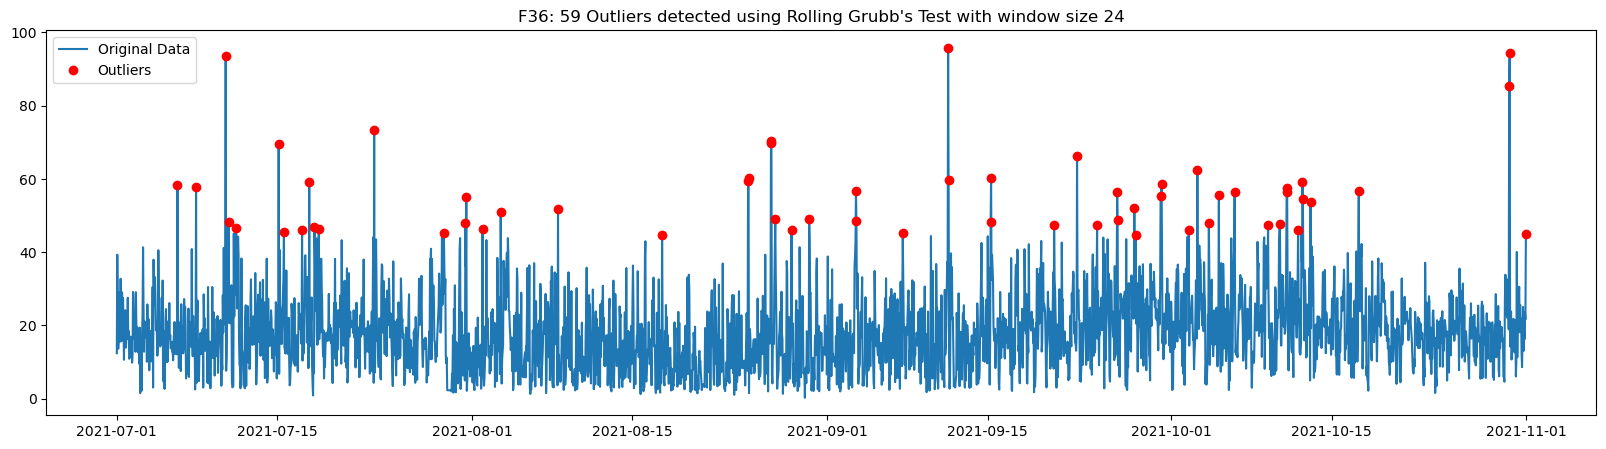

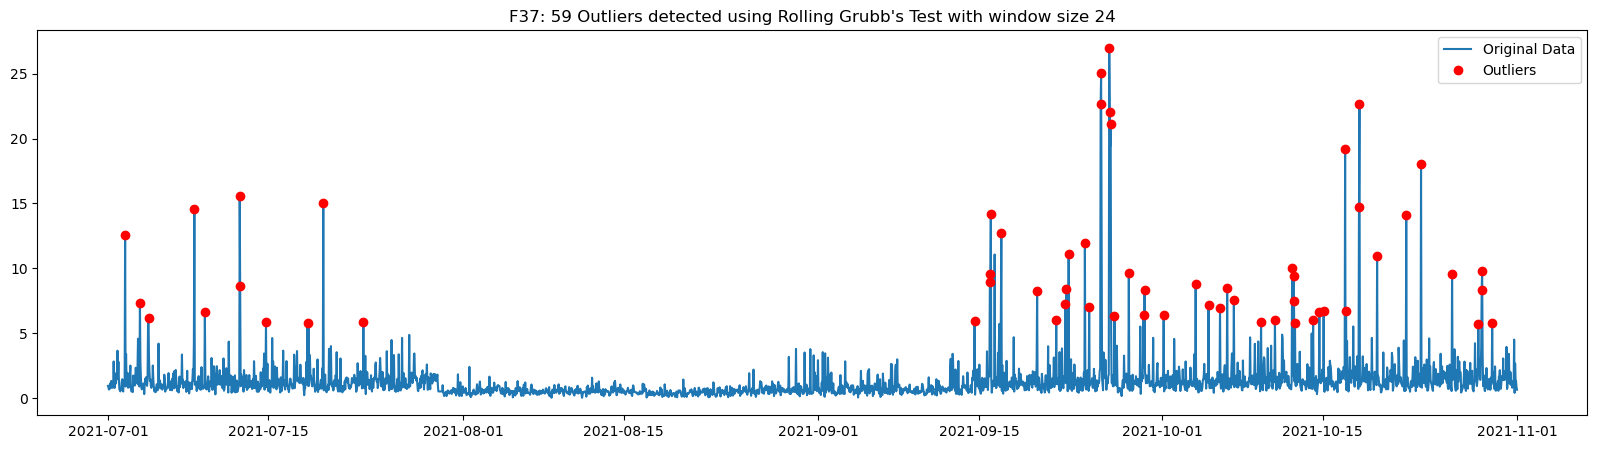

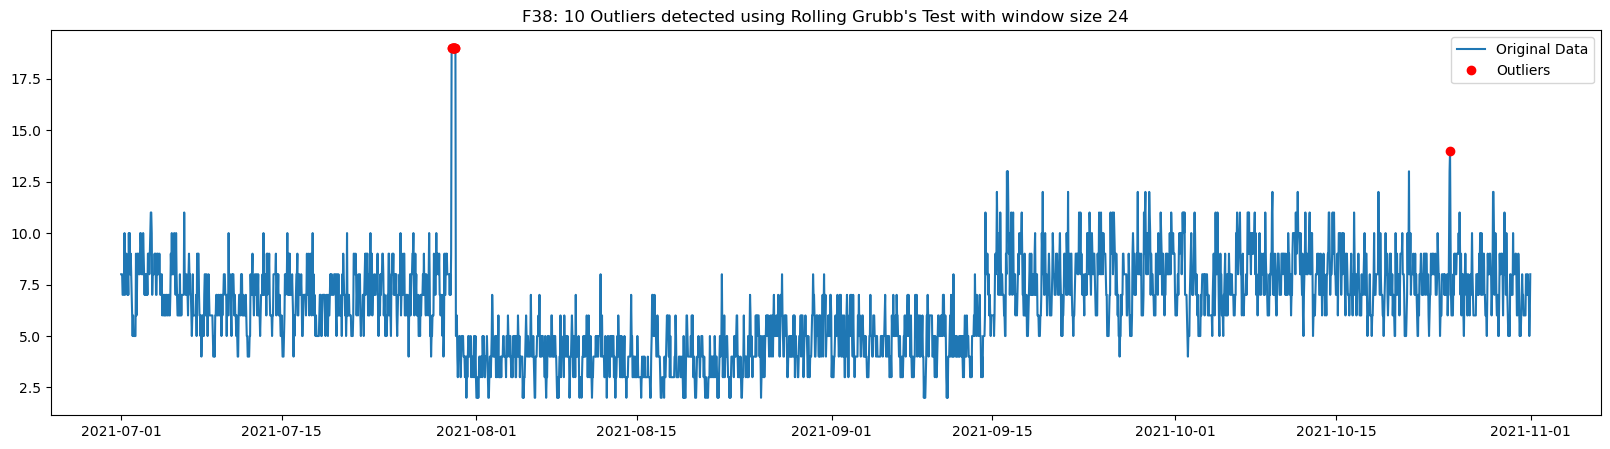

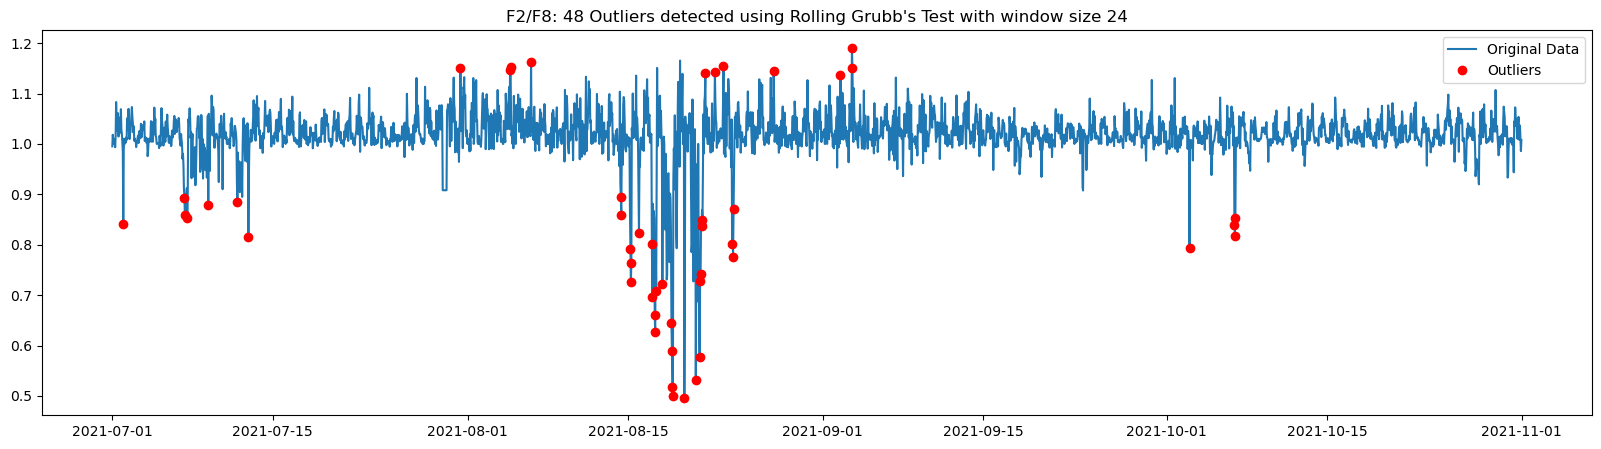

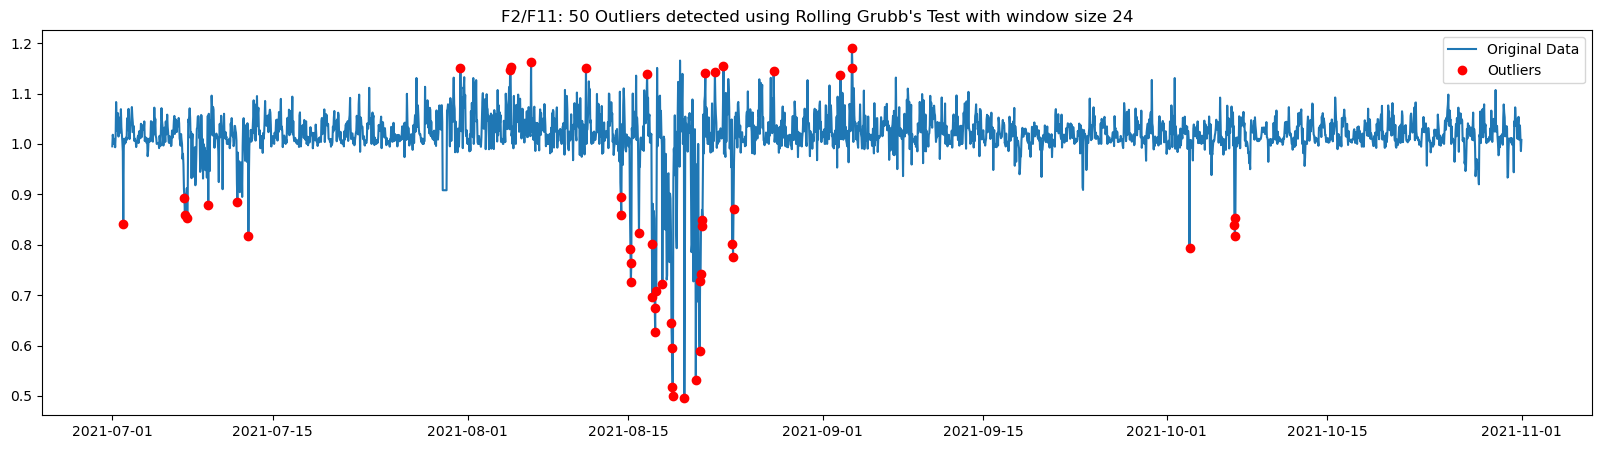

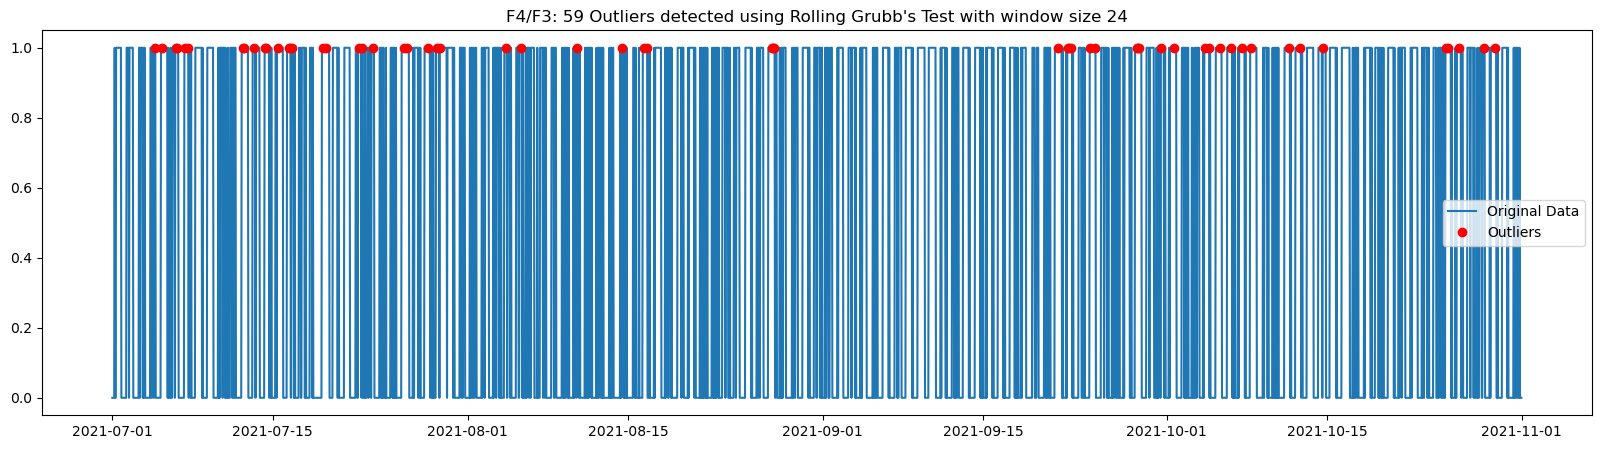

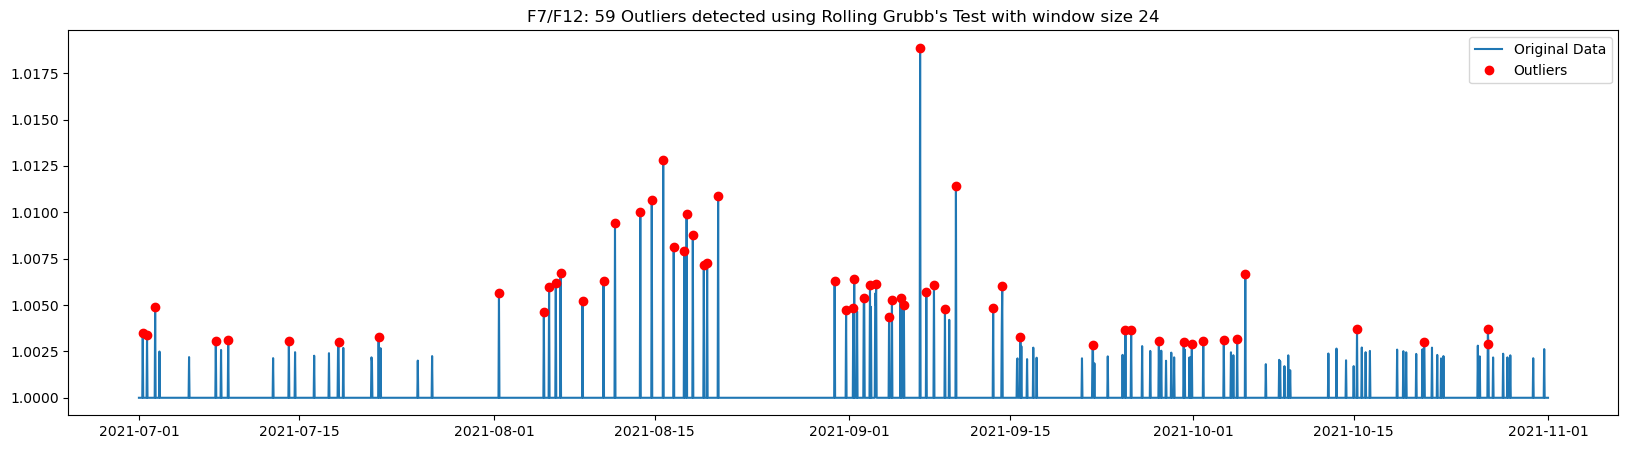

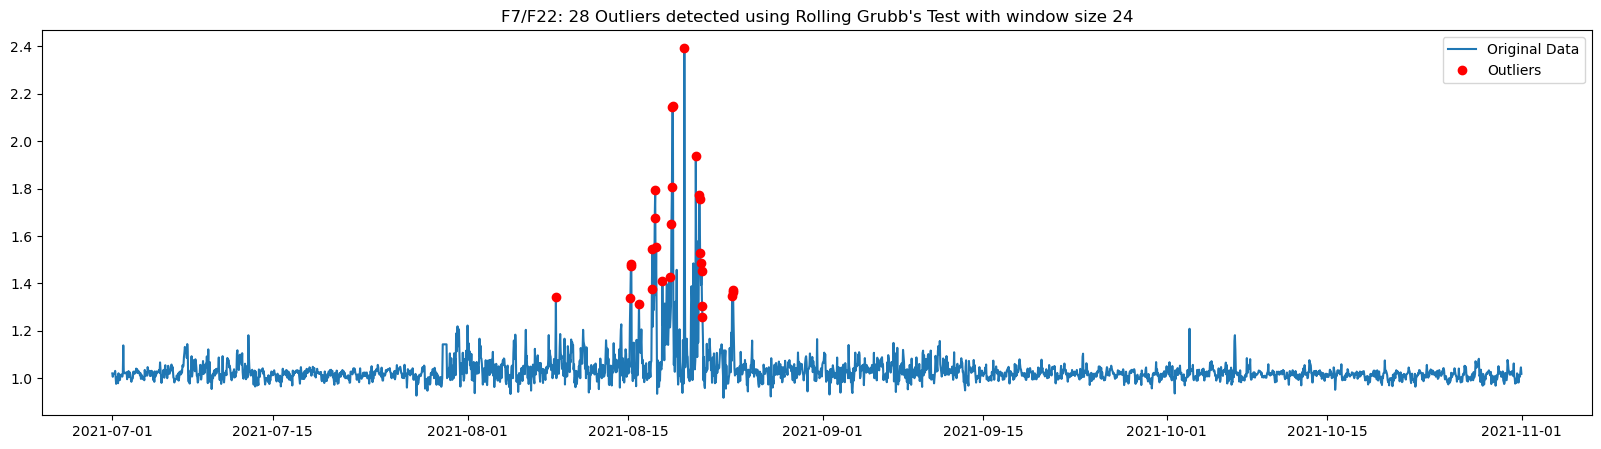

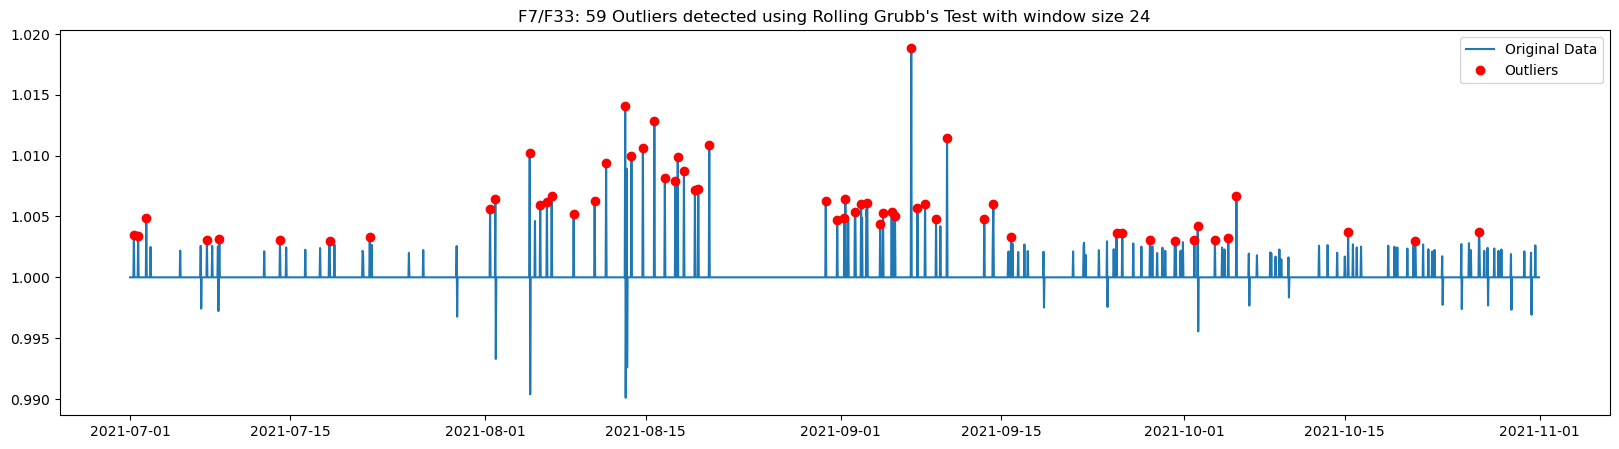

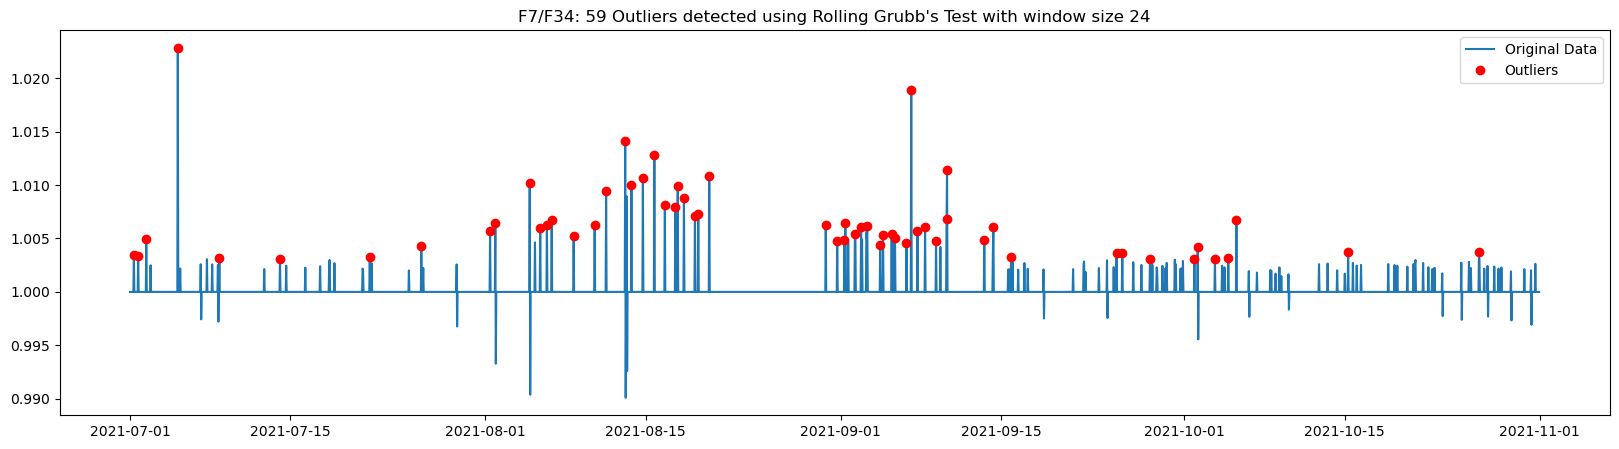

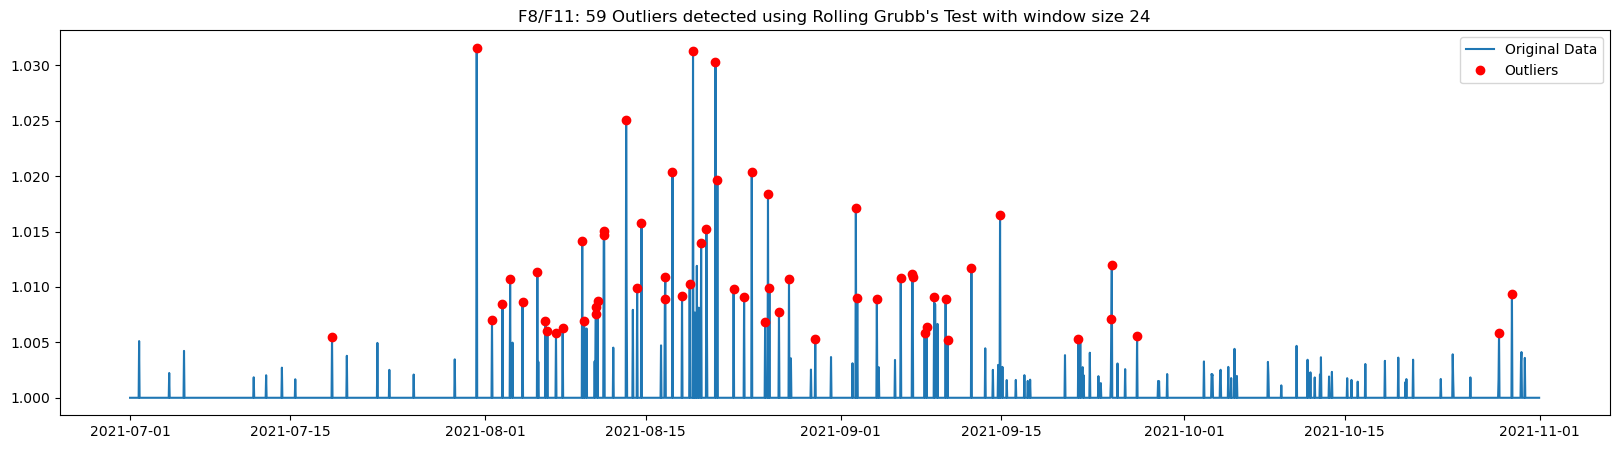

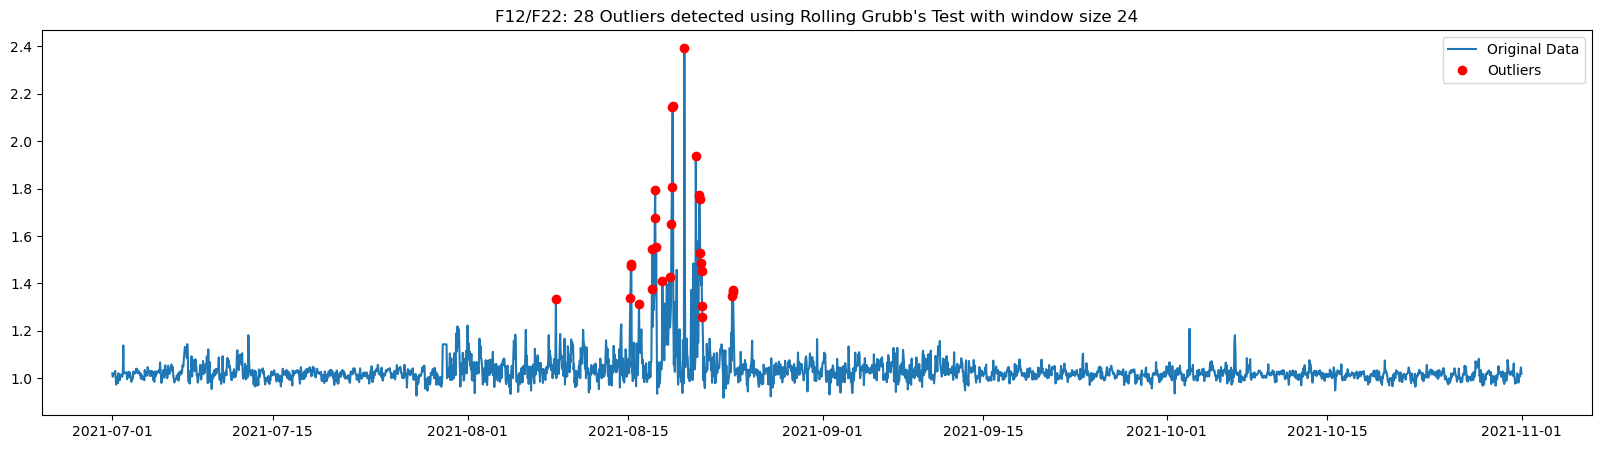

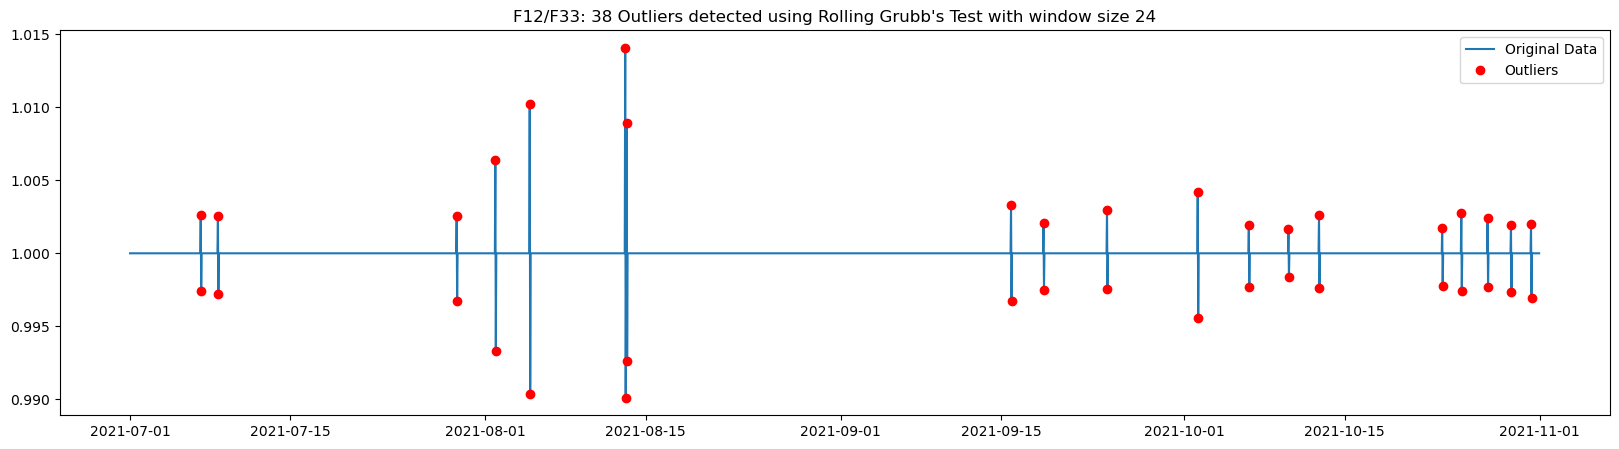

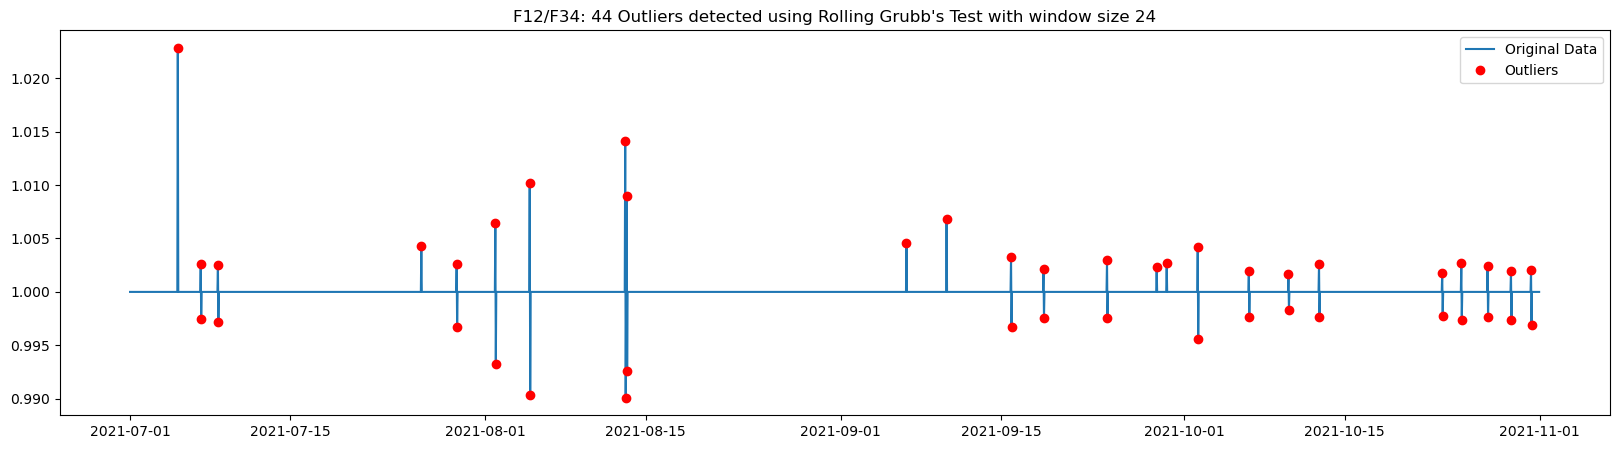

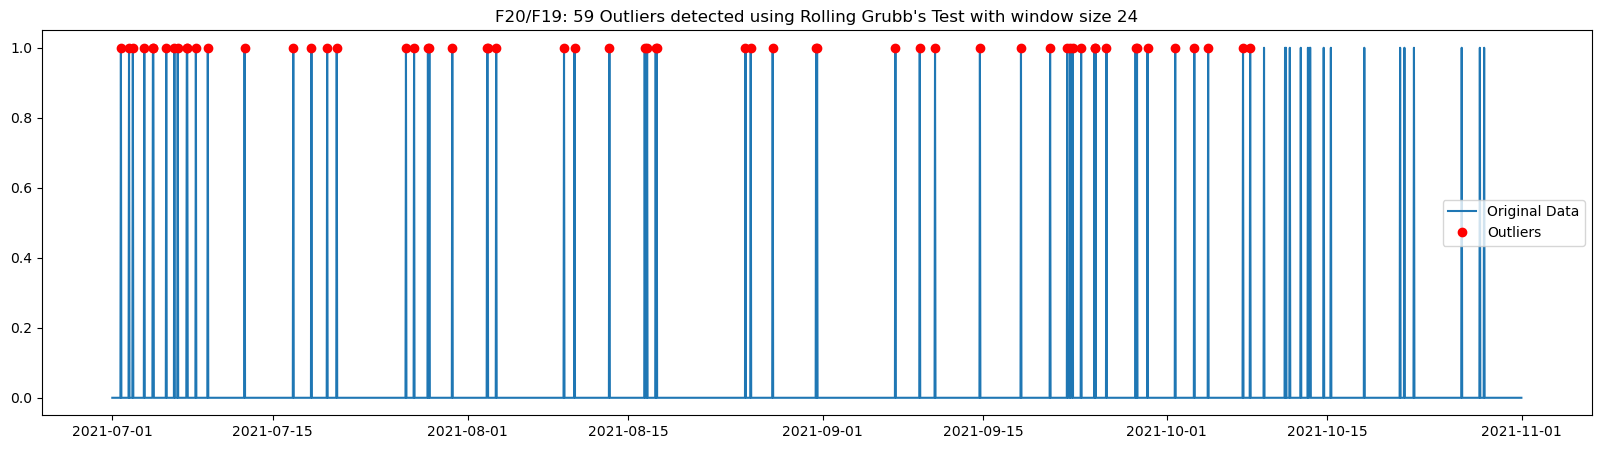

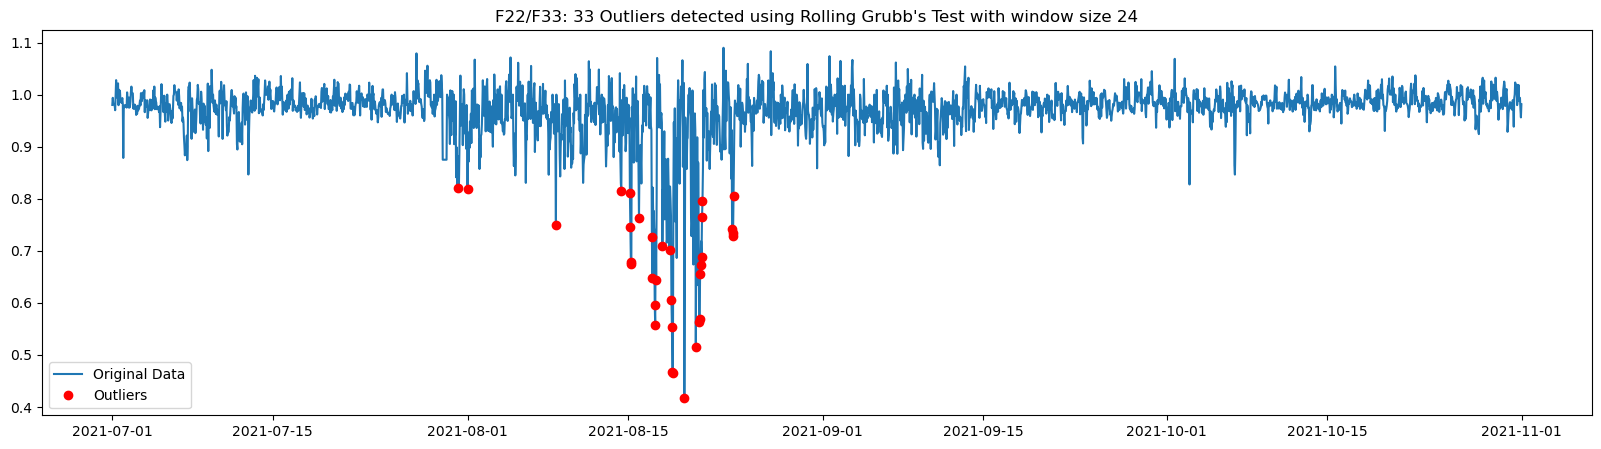

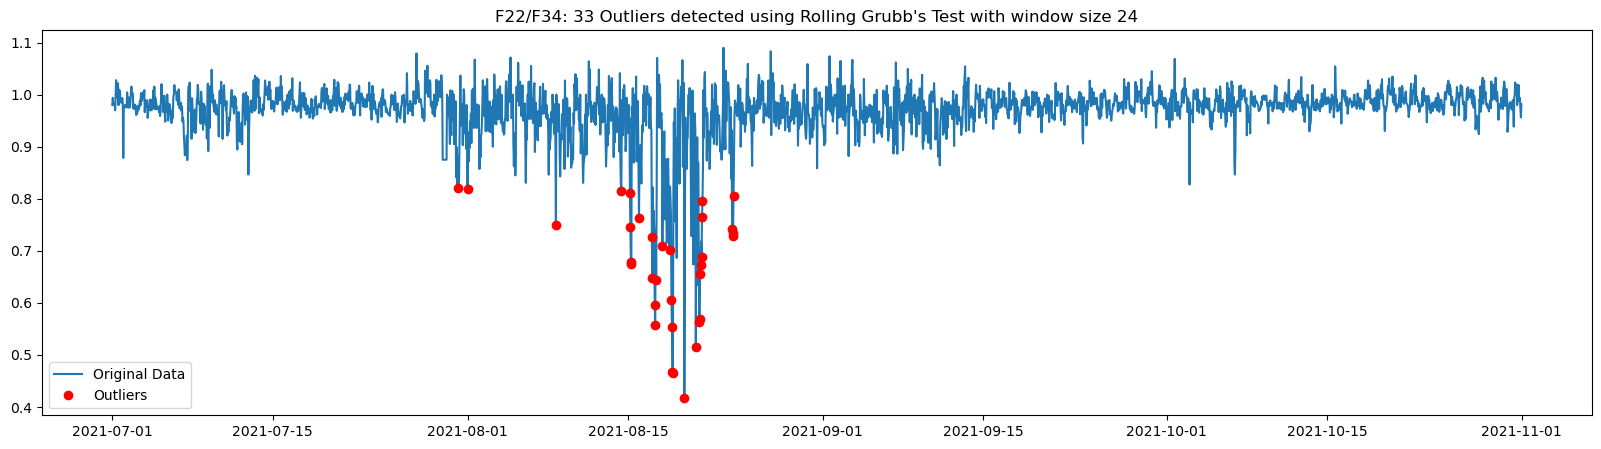

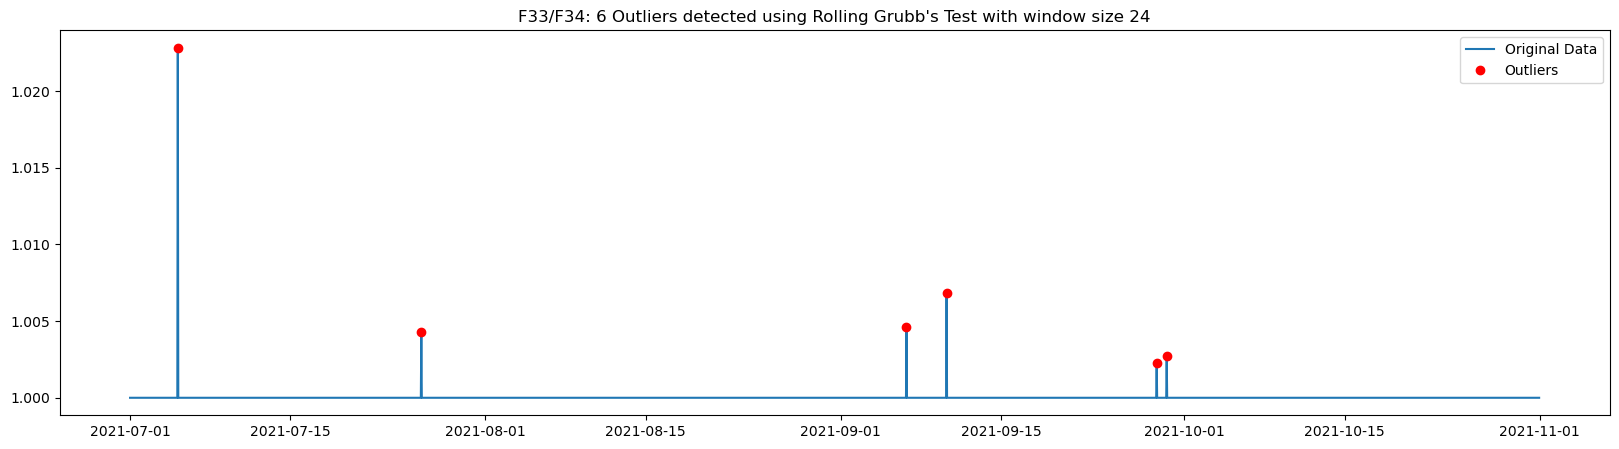

In [16]:
data = pd.read_csv('C:\\Users\\disha\\Downloads\\feature_seln_new.csv',parse_dates=['START_TIME'])
df = data[data.columns[1:]]
num_data_points = df.shape[0]
num_anomalies = int(0.02 * num_data_points)
#num_features = df.shape[1] - 1  # excluding the timestamp column
#anomalies_per_feature = num_anomalies // num_features

plt.rcParams['figure.figsize'] = [20, 5]
window_size = 24
alpha = 0.02

for col in df.columns:
    if col != 'START_TIME':
        outliers = rolling_grubbs_test(df, window_size, col, alpha)
        if len(outliers) > 0:
            anomalies = df.iloc[outliers][[col]]
            top_n_anomalies = anomalies.nlargest(num_anomalies, col)
            outliers = top_n_anomalies.index.tolist()
        else:
            outliers = []
        fig, ax = plt.subplots()
        ax.plot(df['START_TIME'], df[col], label='Original Data')
        if outliers:
            ax.plot(df['START_TIME'][outliers], df[col][outliers], 'ro', label='Outliers')
            ax.legend()
            plt.title(f"{col}: {len(outliers)} Outliers detected using Rolling Grubb's Test with window size {window_size}")
        else:
            plt.title(f"{col}: No Outliers detected using Rolling Grubb's Test with window size {window_size}")
        plt.show()


In [20]:
num_data_points = df.shape[0]

In [21]:
num_anomalies = int(0.02 * num_data_points)

In [22]:
num_features = df.shape[1] - 1

In [23]:
anomalies_per_feature = num_anomalies // num_features

In [24]:
print(anomalies_per_feature)

1


In [25]:
print(num_anomalies)

59
